In [29]:
import pandas as pd
import numpy as np
# from sage.symbolic.substitution_map import make_map
import sympy as sp
from sympy import symbols, Matrix
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import graph_objects as go
import plotly.express as px

from IPython.display import Image

In [30]:
# Mmax = np.loadtxt('/home/matteo/ownCloud/UNITN/Tecnica-delle-Costruzioni/Esercitazione/TdC/export/var/Mmax.txt') #Linux
Mmax = np.loadtxt('C:\\Users\\anzo5\\TdC\\Esercitazione\\TdC\\export\\var\\Mmax.txt') #Windows
# Mmin = np.loadtxt('/home/matteo/ownCloud/UNITN/Tecnica-delle-Costruzioni/Esercitazione/TdC/export/var/Mmin.txt') #Linux
Mmin = np.loadtxt('C:\\Users\\anzo5\\TdC\\Esercitazione\\TdC\\export\\var\\Mmin.txt')#Windows
# MEd_slu = pd.read_csv('/home/matteo/ownCloud/UNITN/Tecnica-delle-Costruzioni/Esercitazione/TdC/export/var/MEd_slu.csv') #Linux
MEd_slu = pd.read_csv('C:\\Users\\anzo5\\TdC\\Esercitazione\\TdC\\export\\var\\MEd_slu.csv')#Windows
MEd_slu

Section  MEd+ [kN m]  smax [m]  MEd- [kN m]  smin [m]
0       C1    95.189448      1.26          NaN       NaN
1       N2          NaN       NaN  -199.249367      3.00
2       C2   156.565614      5.32     0.000000       NaN
3       N3          NaN       NaN  -216.792778      7.50
4       C3   124.347537      9.55   -39.690612      9.47
5       N4          NaN       NaN  -210.348968     11.50
6       C4   151.829401     13.96    -6.190556     13.74
7       N5          NaN       NaN  -236.629193     16.50
8       C5   144.511198     19.56     0.000000       NaN
9       N6          NaN       NaN  -187.959174     22.65
10      C6    87.580801     25.00          NaN       NaN

In [31]:
smax = MEd_slu[['smax [m]']].to_numpy()
smin = MEd_slu[['smin [m]']].to_numpy()

smaxmin = np.sort((np.concatenate((smax, smin))).reshape(-1))
smaxmin = np.insert(smaxmin, -1, 26.65)

#ss is for plot
ss=smaxmin
for i in range (0, len(ss)-1):
    if ss[i+1] - ss[i] < 0.5:
        ss[i] = ss[i+1]
        
ss = pd.Series(ss).fillna(method='ffill') 
ss = ss.drop_duplicates()

In [32]:
MEd = np.array([95.189448, 199.249367, 156.565614, 216.792778, 124.347537, 
#                 39.690612,
                210.348968, 151.829401,
#                 6.190556,
                236.629193, 144.511198, 187.959174, 87.580801])
MEd

array([ 95.189448, 199.249367, 156.565614, 216.792778, 124.347537,
       210.348968, 151.829401, 236.629193, 144.511198, 187.959174,
        87.580801])

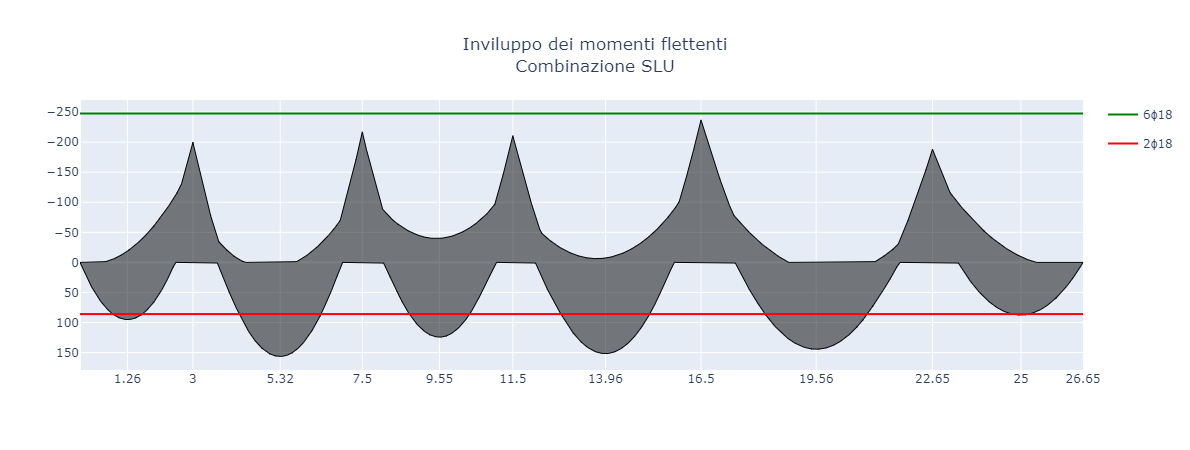

In [33]:
s = np.arange(0,26.65, .001)
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = s,
    y = Mmax,
    name='M+',
    line_color='#000000',
    showlegend=False,
    line = dict(width=1)
))

fig.add_trace(go.Scatter(
    x = s,
    y = Mmin,
    name='M-',
    line_color='#000000',
    fill='tonexty',
    showlegend=False,
    line = dict(width=1)
))


fig.add_trace(go.Scatter(
    x = s, 
    y = -247.64*np.ones(len(s)),
    legendgroup='6',
    name='6ϕ18',
    line_color='green'
))

fig.add_trace(go.Scatter(
    x = s, 
    y = 86*np.ones(len(s)),
    legendgroup='2',
    name='2ϕ18',
    line_color='red'
))


fig.update_yaxes(autorange="reversed")
fig.update_traces(mode='lines')
fig.update_layout(
    title_text=('Inviluppo dei momenti flettenti<br>' + 'Combinazione SLU'),
    title_x=.5,
    autosize=True,
    xaxis = dict(
        tickmode='array',
        tickvals=ss,
        ticktext=ss,
        title=r'$s\,[m]$',
    ),
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 50,
        title=r'$M_{Ed}\,[kN\,m]$'
    ),
    xaxis_showgrid=True, 
    yaxis_showgrid=True,
)

# fig.write_image("export/img/bendingMomentEnvelope.eps")

fig.update_yaxes(automargin=True)
fig.show()

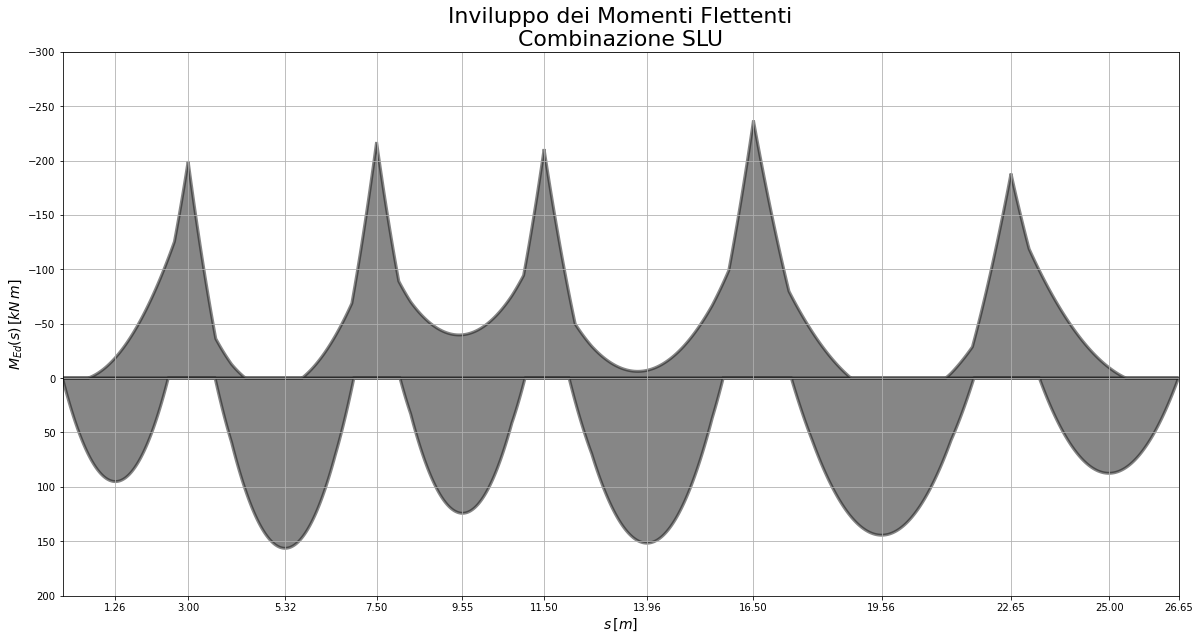

In [34]:
s = np.arange(0,26.65, .001)
fig = plt.figure(figsize=(20,10))
plt.fill(s, Mmax, linewidth='3', color='#0f0f0f80')
plt.fill(s, Mmin, linewidth='3', color='#0f0f0f80')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{Ed}(s)\,[kN\,m]$', fontsize='14')
plt.xticks(ss)
plt.yticks(np.arange(-300, 250, step=50))
plt.title('Inviluppo dei Momenti Flettenti\nCombinazione SLU', fontsize='22')
plt.savefig('export/img/bendingMomentEnvelopeBeam_slu')
plt.show()

---
## Progetto
### Sezione maggiormante sollecitata

In [35]:
beta, psi, xi, d, As, mylambda, x, A1s, epsilons, epsilon1s, sigmas, sigma1s, M, Phi = symbols('beta, psi, xi, d, As, mylambda, x, A1s, epsilons, epsilon1s, sigmas, sigma1s, M, Phi')


In [36]:
fck = 25;
alphacc = .85
gammac = 1.5
fcd = round(fck*alphacc/gammac,2)
epsilonc2 = 2/1000
epsiloncu = 3.5/1000
#------------
fyk = 450
gammas = 1.15
fyd = round(fyk/gammas,2)
Es = 210*10**3
epsilonse = fyd/Es
epsilonsu = 10/1000
#------------------
b = 300;
beta0 = .3
d1 = 40
d2 = 40
psi23 = .80952
mylambda23 = .416
xi23 = .2593

xi2a2b = .23034
psi2u = 1-1/3 * epsilonc2/epsilonsu * (1-xi)/xi
mylambda2u = ((6*epsilonsu**2+4*epsilonsu*epsilonc2 + epsilonc2**2)*xi**2 - 2*epsilonc2**2 *xi + epsilonc2**2 - 4*epsilonsu*epsilonc2*xi)/(4*epsilonsu*xi*((3*epsilonsu+epsilonc2)*xi-epsilonc2))

psi2 = xi/(1-xi) * epsilonsu/(3*epsilonc2**2) * (3*epsilonc2 - xi/(1-xi)*epsilonsu)
mylambda2 = (4*epsilonc2-epsilonsu*xi/(1-xi))/(4*(3*epsilonc2-epsilonsu*xi/(1-xi)))

In [37]:
eqtd = b*psi*xi*d*fcd + beta*As*sigma1s - As*sigmas
eqrd = b*psi*xi*d**2*fcd*(1-mylambda*xi) + beta*As*sigma1s*(d-d2) - M*10**6

In [38]:
eqtd

As*beta*sigma1s - As*sigmas + 4251.0*d*psi*xi

In [39]:
eqrd

As*beta*sigma1s*(d - 40) - 1000000*M + 4251.0*d**2*psi*xi*(-mylambda*xi + 1)

In [46]:
len(MEd)

11

In [48]:
solve(eqtd, As)[0]

-4251.0*d*psi*xi/(beta*sigma1s - sigmas)

In [51]:
As00 = (solve(eqtd, As)[0]).subs({psi:psi23, xi:xi23, sigmas:fyd, sigma1s:fyd, beta:beta0})
d0 = (solve(eqrd.subs({As:As00}), d)[1]).subs({psi:psi23, xi:xi23, sigma1s:fyd, mylambda:mylambda23, M:max(MEd),beta:beta0})

print(As00, '\n',d0)

3.25771671912672*d 
 454.633018954673


In [52]:
d0 = ceiling((d0+d1)/10)*10 - d1
d0

460

In [53]:
As0 = np.zeros(len(MEd))
As0[np.argmax(MEd)] = As00.subs({d:d0})
As0.max()

1498.549690798291

Si scelgono $\Phi 18\,mm$

In [57]:
k = symbols('k')
Phi0 = 18
nums = 0*As0
num1s = 0*nums

for i in range(len(As0)):
    nums[i] = ceiling((float(solve(k*pi*Phi0**2 /4 - As0[i], k)[0])))
    
def area(Phi):
    return pi*Phi**2 /4

As0 = area(Phi0)*nums

A1s0 = As0 * beta0
for i in range(len(As0)):
    num1s[i] = ceiling(solve(k*area(Phi0) - A1s0[i], k)[0])
A1s0 = area(Phi0)*num1s
A1s0

array([0, 0, 0, 0, 0, 0, 0, 162*pi, 0, 0, 0], dtype=object)

### Tutte le altre sezioni

In [58]:
eqrd1 = b*psi*xi*d*fcd*(mylambda*xi*d - d2) - As*sigmas*(d-d2) + M*10**6
As00 = np.zeros(len(MEd))
nums = 0*As0

for i in range (len(MEd)):
    As00[i] = (solve(eqrd1, As)[0]).subs({d:d0, psi:psi23, xi:xi23, sigmas:fyd, mylambda:mylambda23, M:MEd[i]})
    nums[i] = ceiling(solve(k*area(Phi0) - As00[i], k)[0])
    if nums[i] < 2:
        nums[i] = 2;
print(As00,'\n', nums)




[ 603.2273571  1236.4032117   976.68436853 1343.15002026  780.64627207
 1303.94121688  947.86582107 1463.84912459  903.33657789 1167.70550686
  556.93084243] 
 [3 5 4 6 4 6 4 6 4 5 3]


L'area dell'armatura tesa è

In [59]:
As0 = area(Phi0) * nums
Matrix(As0)

Matrix([
[243*pi],
[405*pi],
[324*pi],
[486*pi],
[324*pi],
[486*pi],
[324*pi],
[486*pi],
[324*pi],
[405*pi],
[243*pi]])

In [60]:
A1s00 = np.zeros(len(MEd))
num1s = 0*nums
for i in range (len(MEd)):
    A1s00[i] = (solve(eqrd, As)[0]).subs({beta:1, d:d0, psi:psi23, xi:xi23, sigma1s:fyd, mylambda:mylambda23, M:MEd[i]})
    num1s[i] = ceiling(solve(k*area(Phi0) - A1s00[i], k)[0])
    if num1s[i] < 2:
        num1s[i] = 2;
print(A1s00,'\n', num1s)

[-445.75742646  187.41842814  -72.30041503  294.1652367  -268.33851149
  254.95643333 -101.11896249  414.86434103 -145.64820567  118.7207233
 -492.05394113] 
 [2 2 2 2 2 2 2 2 2 2 2]


L'area dell'armatura compressa è

In [61]:
A1s0 = area(Phi0) * num1s
Matrix(A1s0)

Matrix([
[162*pi],
[162*pi],
[162*pi],
[162*pi],
[162*pi],
[162*pi],
[162*pi],
[162*pi],
[162*pi],
[162*pi],
[162*pi]])

---
## Verifica

In [53]:
eqt = b*psi*xi*d*fcd + A1s*sigma1s - As*sigmas
eqr = b*psi*xi*d**2*fcd*(1-mylambda*xi) + A1s*sigma1s*(d-d2) - M*10**6
xid = np.zeros(len(MEd))

for i in range (len(MEd)):
    xid[i] = (n((solve(eqt, xi, solution_dict=True)[0][xi]).subs({psi:psi23, d:d0, A1s:A1s0[i], sigma1s:fyd, sigmas:fyd, As:As0[i]})))
    if xid[i] < xi23:
        print(i+1,':\n','Ipotesi di campo 3 errata! La sezione è in campo 2.Ipotesi di campo 2b (armatura compressa snervata) con epsilon_c > epsilon_c2\n') 
        xid[i] = (n((solve(eqt.subs({psi:psi2u}), xi, solution_dict=True)[0][xi]).subs({ d:d0, A1s:A1s0[i], sigma1s:fyd, sigmas:fyd, As:As0[i]})))
        epsilonc[i] = epsilonsu * xid[i]/(1-xid[i])
        if epsilonc[i] < epsilonc2:
            print('Ipotesi sul campo deformativo del cls errata!\tDifferenza:',epsilonc[i]-epsilonc2,'\n')
            xid[i] = (n((solve(eqt.subs({psi:psi2}), xi, solution_dict=True)[0][xi]).subs({ d:d0, A1s:A1s0[i], sigma1s:fyd, sigmas:fyd, As:As0[i]}))).real()
        if xid[i] > xi2a2b and xid[i] < xi23:
            print('Ipotesi di campo 2b corretta. Le armature compresse sono snervate.\n')
        elif xid[i] < xi2a2b:
            print('Ipotesi di campo 2b errata! La sezione è in campo 2a con armature compresse in campo elastico!\n')
            xid[i] = n(solve(eqt.subs({psi:psi2u, d:d0, A1s:A1s0[i], sigma1s:Es*epsilonsu*(xi-d2/d0)/(1-xi), As:As0[i], sigmas:fyd}), xi, solution_dict=True)[0][xi])
            epsilonc[i] = epsilonsu * xid[i]/(1-xid[i])
            if epsilonc[i] < epsilonc2:
                xid[i] = n(solve(eqt.subs({psi:psi2, d:d0, A1s:A1s0[i], sigma1s:Es*epsilonsu*(xi-d2/d0)/(1-xi), As:As0[i], sigmas:fyd}), xi, solution_dict=True)[0][xi]).real()
                print('Ipotesi sul campo deformativo del cls errata!\tDifferenza:',epsilonc[i]-epsilonc2,'\n')
            if xid[i] > xi2a2b:
                print('Verifica la deformazione del cls!\n')
    elif xid[i] >= xi23:
        print('Ipotesi di campo 3 corretta')

1 :
 Ipotesi di campo 3 errata! La sezione è in campo 2.Ipotesi di campo 2b (armatura compressa snervata) con epsilon_c > epsilon_c2



NameError: name 'epsilonc' is not defined

La deformazione del calcestruzzo al lembo superiore è

In [54]:
Matrix(xid)

Matrix([
[0.110238314274514],
[              0.0],
[              0.0],
[              0.0],
[              0.0],
[              0.0],
[              0.0],
[              0.0],
[              0.0],
[              0.0],
[              0.0]])

In [55]:
Matrix(epsilonc)

NameError: name 'epsilonc' is not defined

In [60]:
MRd_pos = np.zeros(len(xid))
epsilonc = np.zeros(len(xid))

for i in range (len(xid)):
    if xid[i] >= xi23 and epsilonc[i] > epsilonc2 and epsilonc[i] < epsiloncu:
        MRd_pos[i] = (n(solve(eqr.subs({psi:psi23, xi:xid[i], d:d0, mylambda:mylambda23, A1s:A1s0[i], sigma1s:fyd, As:As0[i], sigmas:fyd}), M, solution_dict=True)[0][M].subs({xi:xid[i]})))
    elif xid[i] < xi23 and xid[i] > xi2a2b and epsilonc[i] > epsilonc2 and epsilonc[i] < epsiloncu:
        MRd_pos[i] = (n(solve(eqr.subs({psi:psi2u, xi:xid[i], d:d0, mylambda:mylambda2u, A1s:A1s0[i], sigma1s:fyd, As:As0[i], sigmas:fyd}), M, solution_dict=True)[0][M].subs({xi:xid[i]})))
    elif xid[i] < xi2a2b and epsilonc[i] > epsilonc2 and epsilonc[i] < epsiloncu:
        MRd_pos[i] = (n(solve(eqr.subs({psi:psi2u, xi:xid[i], d:d0, mylambda:mylambda2u, A1s:A1s0[i], sigma1s:Es*epsilonsu*(xid[i] - d2/d0)/(1-xid[i]), As:As0[i], sigmas:fyd}), M, solution_dict=True)[0][M].subs({xi:xid[i]})))
    elif xid[i] < xi23 and xid[i] > xi2a2b and epsilonc[i] < epsilonc2:
        MRd_pos[i] = (n(solve(eqr.subs({psi:psi2, xi:xid[i], d:d0, mylambda:mylambda2, A1s:A1s0[i], sigma1s:fyd, As:As0[i], sigmas:fyd}), M, solution_dict=True)[0][M].subs({xi:xid[i]})))  
    elif xid[i] < xi2a2b and epsilonc[i] < epsilonc2:
        MRd_pos[i] = (n(solve(eqr.subs({psi:psi2, xi:xid[i], d:d0, mylambda:mylambda2, A1s:A1s0[i], sigma1s:Es*epsilonsu*(xid[i] - d2/d0)/(1-xid[i]), As:As0[i], sigmas:fyd}), M, solution_dict=True)[0][M].subs({xi:xid[i]})))

Matrix(MRd_pos)

Matrix([
[-31.9275163245493],
[-39.0333325839586],
[-39.0333325839586],
[-39.0333325839586],
[-39.0333325839586],
[-39.0333325839586],
[-39.0333325839586],
[-39.0333325839586],
[-39.0333325839586],
[-39.0333325839586],
[-39.0333325839586]])

In [61]:
for i in range (len(MEd)):
    xid[i] = (n((solve(eqt, xi, solution_dict=True)[0][xi]).subs({psi:psi23, d:d0, A1s:As0[i], sigma1s:fyd, sigmas:fyd, As:A1s0[i]})))
    if xid[i] < xi23:
        print(i+1,':\n','Ipotesi di campo 3 errata! La sezione è in campo 2.Ipotesi di campo 2b (armatura compressa snervata) con epsilon_c > epsilon_c2\n') 
        xid[i] = (n((solve(eqt.subs({psi:psi2u}), xi, solution_dict=True)[0][xi]).subs({ d:d0, A1s:As0[i], sigma1s:fyd, sigmas:fyd, As:A1s0[i]})))
        epsilonc[i] = epsilonsu * xid[i]/(1-xid[i])
        if epsilonc[i] < epsilonc2:
            print('Ipotesi sul campo deformativo del cls errata!\tDifferenza:',epsilonc[i]-epsilonc2,'\n')
            xid[i] = (n((solve(eqt.subs({psi:psi2}), xi, solution_dict=True)[0][xi]).subs({ d:d0, A1s:As0[i], sigma1s:fyd, sigmas:fyd, As:A1s0[i]}))).real()
        if xid[i] > xi2a2b and xid[i] < xi23:
            print('Ipotesi di campo 2b corretta. Le armature compresse sono snervate.\n')
        elif xid[i] < xi2a2b:
            print('Ipotesi di campo 2b errata! La sezione è in campo 2a con armature compresse in campo elastico!\n')
            xid[i] = n(solve(eqt.subs({psi:psi2u, d:d0, A1s:As0[i], sigma1s:Es*epsilonsu*(xi-d2/d0)/(1-xi), As:A1s0[i], sigmas:fyd}), xi, solution_dict=True)[0][xi])
            epsilonc[i] = epsilonsu * xid[i]/(1-xid[i])
            if epsilonc[i] < epsilonc2:
                xid[i] = n(solve(eqt.subs({psi:psi2, d:d0, A1s:As0[i], sigma1s:Es*epsilonsu*(xi-d2/d0)/(1-xi), As:A1s0[i], sigmas:fyd}), xi, solution_dict=True)[0][xi]).real()
                print('Ipotesi sul campo deformativo del cls errata!\tDifferenza:',epsilonc[i]-epsilonc2,'\n')
            if xid[i] > xi2a2b:
                print('Verifica la deformazione del cls!\n')
    elif xid[i] >= xi23:
        print('Ipotesi di campo 3 corretta')

1 :
 Ipotesi di campo 3 errata! La sezione è in campo 2.Ipotesi di campo 2b (armatura compressa snervata) con epsilon_c > epsilon_c2

Ipotesi sul campo deformativo del cls errata!	Differenza: -0.0018501714203394992 

Ipotesi di campo 2b errata! La sezione è in campo 2a con armature compresse in campo elastico!

Ipotesi sul campo deformativo del cls errata!	Differenza: -0.0005744305242395514 

2 :
 Ipotesi di campo 3 errata! La sezione è in campo 2.Ipotesi di campo 2b (armatura compressa snervata) con epsilon_c > epsilon_c2

Ipotesi sul campo deformativo del cls errata!	Differenza: -0.002746866168174395 

Ipotesi di campo 2b errata! La sezione è in campo 2a con armature compresse in campo elastico!

Ipotesi sul campo deformativo del cls errata!	Differenza: -0.0006883459725246508 

3 :
 Ipotesi di campo 3 errata! La sezione è in campo 2.Ipotesi di campo 2b (armatura compressa snervata) con epsilon_c > epsilon_c2

Ipotesi sul campo deformativo del cls errata!	Differenza: -0.00231923886405

In [62]:
MRd_neg = np.zeros(len(xid))

for i in range (len(xid)):
    if xid[i] >= xi23 and epsilonc[i] > epsilonc2 and epsilonc[i] < epsiloncu:
        MRd_neg[i] = (n(solve(eqrd1.subs({psi:psi23, xi:xid[i], d:d0, mylambda:mylambda23, A1s:As0[i], sigma1s:fyd, As:A1s0[i], sigmas:fyd}), M, solution_dict=True)[0][M].subs({xi:xid[i]})))
    elif xid[i] < xi23 and xid[i] > xi2a2b and epsilonc[i] > epsilonc2 and epsilonc[i] < epsiloncu:
        MRd_neg[i] = (n(solve(eqrd1.subs({psi:psi2u, xi:xid[i], d:d0, mylambda:mylambda2u, A1s:As0[i], sigma1s:fyd, As:A1s0[i], sigmas:fyd}), M, solution_dict=True)[0][M].subs({xi:xid[i]})))
    elif xid[i] < xi2a2b and epsilonc[i] > epsilonc2 and epsilonc[i] < epsiloncu:
        MRd_neg[i] = (n(solve(eqrd1.subs({psi:psi2u, xi:xid[i], d:d0, mylambda:mylambda2u, A1s:As0[i], sigma1s:Es*epsilonsu*(xid[i] - d2/d0)/(1-xid[i]), As:A1s0[i], sigmas:fyd}), M, solution_dict=True)[0][M].subs({xi:xid[i]})))
    elif xid[i] < xi23 and xid[i] > xi2a2b and epsilonc[i] < epsilonc2:
        MRd_neg[i] = (n(solve(eqrd1.subs({psi:psi2, xi:xid[i], d:d0, mylambda:mylambda2, A1s:As0[i], sigma1s:fyd, As:A1s0[i], sigmas:fyd}), M, solution_dict=True)[0][M].subs({xi:xid[i]})))  
    elif xid[i] < xi2a2b and epsilonc[i] < epsilonc2:
        MRd_neg[i] = (n(solve(eqrd1.subs({psi:psi2, xi:xid[i], d:d0, mylambda:mylambda2, A1s:As0[i], sigma1s:Es*epsilonsu*(xid[i] - d2/d0)/(1-xid[i]), As:A1s0[i], sigmas:fyd}), M, solution_dict=True)[0][M].subs({xi:xid[i]})))

Matrix(MRd_neg)

Matrix([
[86.2021912782463],
[86.0626787358224],
[86.1282573309842],
[86.0060036033127],
[86.1282573309842],
[86.0060036033127],
[86.1282573309842],
[86.0060036033127],
[86.1282573309842],
[86.0626787358224],
[86.2021912782463]])

In [63]:
MRd_pos > MEd

array([False, False, False, False, False, False, False, False, False,
       False, False])